<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/Tugas%20lainnya/chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
from packaging import version
from sklearn import preprocessing
from sklearn import pipeline

# Cek versi Python dan Scikit-Learn
assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Konfigurasi default visualisasi matplotlib
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Set seed agar hasil reproducible
np.random.seed(42)

In [2]:
import os
import urllib.request
from pathlib import Path

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
datapath = Path("datasets/lifesat")
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath / filename)

In [3]:
datapath = Path("datasets/lifesat")  # direktori penyimpanan data

oecd_bli = pd.read_csv(datapath / "oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv",
                             thousands=",", delimiter="\t",
                             encoding="latin1", na_values="n/a")

# Tampilkan kolom untuk memastikan
print(oecd_bli.columns)
print(gdp_per_capita.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')
Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')


In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_pivot = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita = gdp_per_capita[["Country", "GDP per capita"]]

    merged = pd.merge(oecd_pivot, gdp_per_capita, on="Country")
    merged.set_index("Country", inplace=True)
    return merged[["GDP per capita", "Life satisfaction"]]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

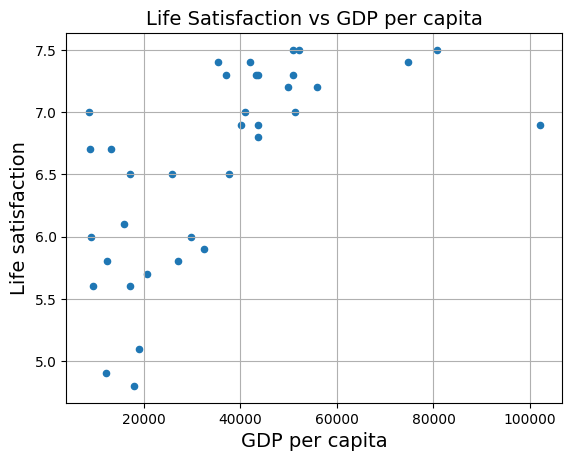

Prediksi Life Satisfaction untuk GDP 22587: 6.286536373197453


In [5]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.title("Life Satisfaction vs GDP per capita")
plt.grid(True)
plt.show()

# --------------------
# Step 5: Train linear regression model
# --------------------
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# --------------------
# Step 6: Make a prediction (contoh: Cyprus GDP = 22587)
# --------------------
X_new = [[22587]]
prediction = model.predict(X_new)
print("Prediksi Life Satisfaction untuk GDP 22587:", prediction[0][0])

In [6]:
import sklearn.neighbors

# Buat model KNN dengan 3 tetangga terdekat
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Latih model dengan data
knn_model.fit(X, y)

# Prediksi untuk GDP per kapita 22.587 (Cyprus)
y_knn_pred = knn_model.predict(X_new)

print(f"Prediksi KNN untuk GDP 22,587: {y_knn_pred[0][0]:.4f}")

Prediksi KNN untuk GDP 22,587: 5.7667


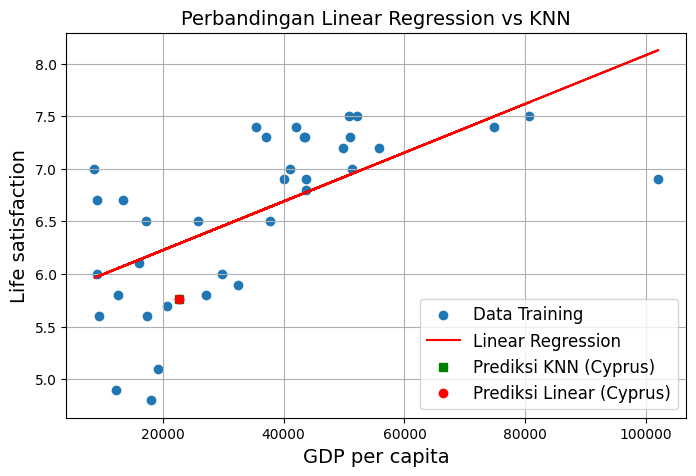

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data Training")

# Garis prediksi Linear Regression
plt.plot(X, model.predict(X), color='red', label="Linear Regression")

# Titik prediksi KNN
plt.plot(X_new, y_knn_pred, "gs", label="Prediksi KNN (Cyprus)")

# Titik prediksi Linear Regression
plt.plot(X_new, y_knn_pred, "ro", label="Prediksi Linear (Cyprus)")

plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.title("Perbandingan Linear Regression vs KNN")
plt.grid(True)
plt.legend()
plt.show()

In [9]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
np.random.seed(42)

In [11]:
oecd_bli = pd.read_csv(datapath / "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [12]:
oecd_bli["Life satisfaction"].head()

,Life satisfaction
Country,
Australia,7.3
Austria,6.9
Belgium,6.9
Brazil,7.0
Canada,7.3


In [13]:
gdp_per_capita = pd.read_csv(datapath/"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [15]:
print(country_stats.columns)

Index(['GDP per capita', 'Life satisfaction'], dtype='object')


In [18]:
gdppc_col = "GDP per capita"  # Sesuai dengan data kamu

min_gdp = 23_500
max_gdp = 62_500

# Filter berdasarkan GDP per capita
country_stats = country_stats[
    (country_stats[gdppc_col] >= min_gdp) &
    (country_stats[gdppc_col] <= max_gdp)
]

# Tampilkan hasilnya
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Australia,50961.865,7.3
Austria,43724.031,6.9
Belgium,40106.632,6.9
Canada,43331.961,7.3
Denmark,52114.165,7.5


In [19]:
country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
country_stats.sort_values(by="GDP per capita", inplace=True)
country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [21]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

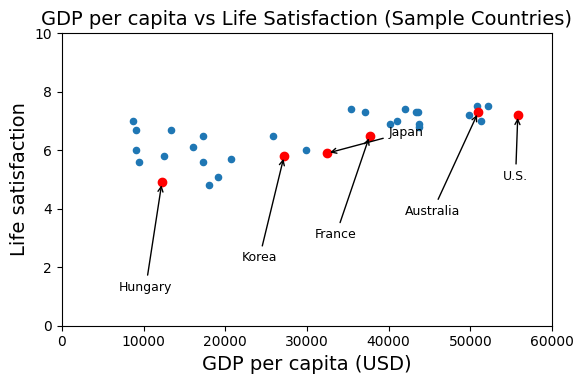

In [23]:
sample_data = country_stats.copy()  # atau subset kalau diperlukan
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(6, 4))
plt.axis([0, 60000, 0, 10])

position_text = {
    "Hungary": (7000, 1.2),
    "Korea": (22000, 2.2),
    "France": (31000, 3.0),
    "Australia": (42000, 3.8),
    "United States": (54000, 5.0),
    "Japan": (40000, 6.5),  # Tambahan negara
}

for country, pos_text in position_text.items():
    try:
        pos_data_x = sample_data.loc[country, "GDP per capita"]
        pos_data_y = sample_data.loc[country, "Life satisfaction"]
        label = "U.S." if country == "United States" else country
        plt.annotate(
            label,
            xy=(pos_data_x, pos_data_y),
            xytext=pos_text,
            fontsize=9,
            arrowprops=dict(facecolor='blue', arrowstyle='->', linewidth=1),
        )
        plt.plot(pos_data_x, pos_data_y, "ro")
    except KeyError:
        print(f"{country} not found in dataset")

plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("GDP per capita vs Life Satisfaction (Sample Countries)")
plt.tight_layout()
plt.show()

In [24]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [25]:
sample_data.loc[list(position_text.keys())]

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Korea,30.0,2.1,10.4,4.2,82.0,18.72,64.0,1.1,19510.0,29091.0,...,14.63,76.0,78.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",27195.197,2014.0
France,12.0,5.0,3.5,0.5,73.0,8.15,64.0,0.6,28799.0,48741.0,...,15.33,80.0,82.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37675.006,2015.0
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
United States,18.0,1.5,8.3,0.1,89.0,11.30,67.0,5.2,41355.0,145769.0,...,14.27,68.0,85.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",55805.204,2015.0
Japan,24.0,1.4,7.3,6.4,94.0,22.26,72.0,0.3,26111.0,86764.0,...,14.93,53.0,85.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",32485.545,2015.0


Saving figure tweaking_model_params_plot_mod


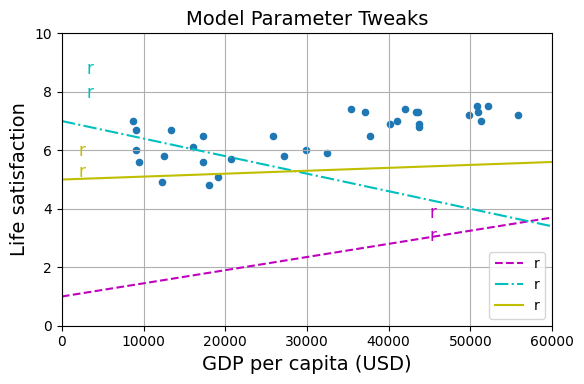

In [40]:
# Plot scatter dari sample_data
sample_data.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(6, 4), grid=True)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Model Parameter Tweaks")
plt.axis([0, 60000, 0, 10])

# Garis X (fit line) untuk beberapa kombinasi theta
X = np.linspace(0, 60000, 1000)

# Garis 1 - garis optimis
plt.plot(X, 1 + 4.5 * X / 100000, "m--", label="r")
plt.text(45000, 3.7, "r", fontsize=12, color="m")
plt.text(45000, 2.9, "r", fontsize=12, color="m")

# Garis 2 - garis pesimis
plt.plot(X, 7 - 6 * X / 100000, "c-.", label="r")
plt.text(3000, 8.6, "r", fontsize=12, color="c")
plt.text(3000, 7.8, "r", fontsize=12, color="c")

# Garis 3 - garis netral
plt.plot(X, 5 + 1 * X / 100000, "y", label="r")
plt.text(2000, 5.8, "r", fontsize=12, color="y")
plt.text(2000, 5.1, "r", fontsize=12, color="y")

plt.legend(loc="lower right", fontsize=10)
save_fig('tweaking_model_params_plot_mod')
plt.show()

In [55]:
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(np.float64(5.763029861307918), np.float64(2.3177337047396075e-05))

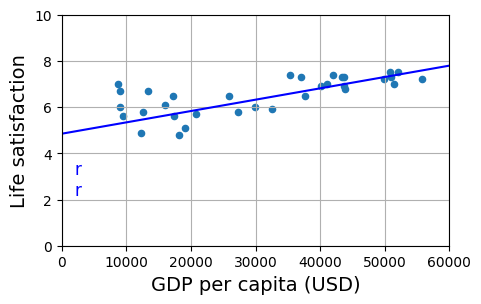

In [41]:
t0, t1 = 4.85, 4.91e-5  # θ₀ dan θ₁

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.plot(np.linspace(0, 60000, 1000), t0 + t1 * np.linspace(0, 60000, 1000), "b")
plt.text(2000, 3.1, "r", fontsize=12, color="b")
plt.text(2000, 2.2, "r", fontsize=12, color="b")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.axis([0, 60000, 0, 10])
plt.grid(True)
plt.show()

In [37]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


np.float64(6.2865477300926065)

Saving figure cyprus_prediction_plot


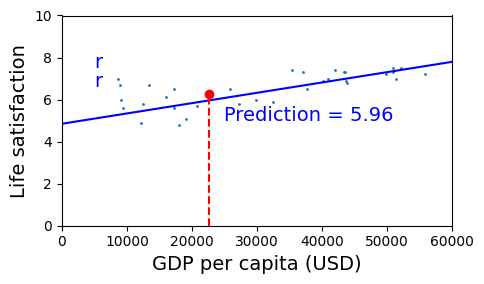

In [39]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, "r", fontsize=14, color="b")
plt.text(5000, 6.6, "r", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

In [42]:
sample_data[7:10]

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,14.90,64.0,79.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17288.083,2014.0


In [43]:
(5.1+5.7+6.5)/3

5.766666666666667

In [44]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')
Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')


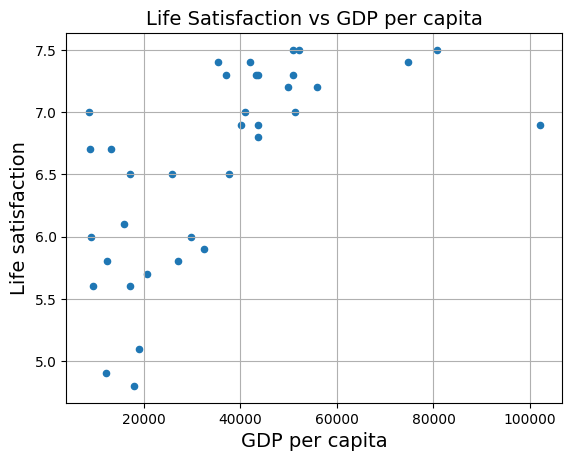

Prediksi Life Satisfaction untuk GDP 22587: 6.286536373197453


In [48]:
# This cell should be re-executed to ensure oecd_bli and gdp_per_capita are in their original state

datapath = Path("datasets/lifesat")  # direktori penyimpanan data

oecd_bli = pd.read_csv(datapath / "oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv",
                             thousands=",", delimiter="\t",
                             encoding="latin1", na_values="n/a")

# Tampilkan kolom untuk memastikan
print(oecd_bli.columns)
print(gdp_per_capita.columns)

# Then, call the prepare_country_stats function
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_pivot = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita = gdp_per_capita[["Country", "GDP per capita"]]

    merged = pd.merge(oecd_pivot, gdp_per_capita, on="Country")
    merged.set_index("Country", inplace=True)
    return merged[["GDP per capita", "Life satisfaction"]]

# This call should now work as oecd_bli has the 'INEQUALITY' column
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.title("Life Satisfaction vs GDP per capita")
plt.grid(True)
plt.show()


model = sklearn.linear_model.LinearRegression()
model.fit(X, y)


X_new = [[22587]]
prediction = model.predict(X_new)
print("Prediksi Life Satisfaction untuk GDP 22587:", prediction[0][0])

In [49]:
oecd_bli, gdp_per_capita = backup

In [50]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [51]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saving figure representative_training_data_scatterplot


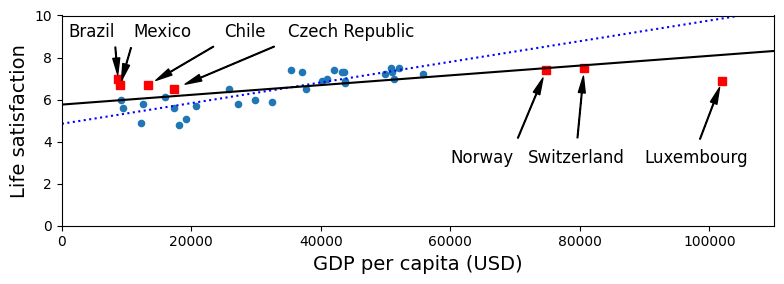

In [53]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[country_stats["GDP per capita"]]
yfull = np.c_[country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

save_fig('representative_training_data_scatterplot')
plt.show()

Saving figure overfitting_model_plot


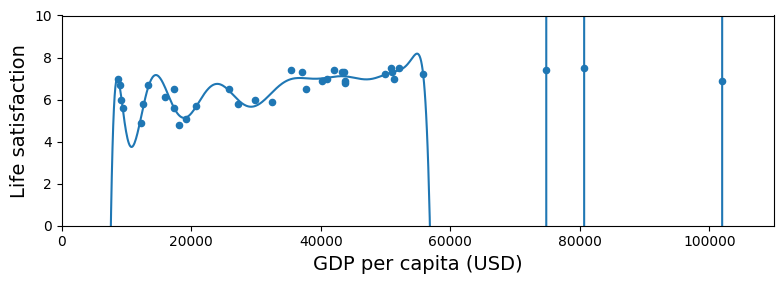

In [56]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])



poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
save_fig('overfitting_model_plot')
plt.show()

In [59]:
country_stats.loc[[c for c in country_stats.index if "W" in c.upper()]]["Life satisfaction"]

,Life satisfaction
Country,
New Zealand,7.3
Norway,7.4
Sweden,7.2
Switzerland,7.5


In [60]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Saving figure ridge_model_plot


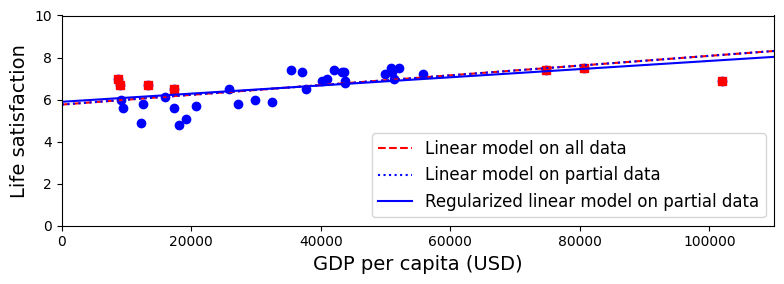

In [61]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_, ridge.coef_[0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
save_fig('ridge_model_plot')
plt.show()